In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.cm as cmx
import openpiv.tools
import openpiv.process
import openpiv.scaling
from skimage import img_as_int
from os import walk

/usr/local/lib/python3.4/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/usr/local/lib/python3.4/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


In [3]:
# Alle file paths der bilder in eine liste lesen : files = ['../data/exp1/f1.jpg', ..., '../data/exp1/f10.jpg' ]
import glob
#TODO add correct path
f = glob.glob('/Users/silviobamert/Desktop/ChuteExperiments/scripts/testPiv/experiment1/*.jpg')
print(f)

['/Users/silviobamert/Desktop/ChuteExperiments/scripts/testPiv/experiment1/experiment1_0001.jpg', '/Users/silviobamert/Desktop/ChuteExperiments/scripts/testPiv/experiment1/experiment1_0002.jpg', '/Users/silviobamert/Desktop/ChuteExperiments/scripts/testPiv/experiment1/experiment1_0003.jpg', '/Users/silviobamert/Desktop/ChuteExperiments/scripts/testPiv/experiment1/experiment1_0004.jpg', '/Users/silviobamert/Desktop/ChuteExperiments/scripts/testPiv/experiment1/experiment1_0005.jpg', '/Users/silviobamert/Desktop/ChuteExperiments/scripts/testPiv/experiment1/experiment1_0006.jpg', '/Users/silviobamert/Desktop/ChuteExperiments/scripts/testPiv/experiment1/experiment1_0007.jpg', '/Users/silviobamert/Desktop/ChuteExperiments/scripts/testPiv/experiment1/experiment1_0008.jpg', '/Users/silviobamert/Desktop/ChuteExperiments/scripts/testPiv/experiment1/experiment1_0009.jpg', '/Users/silviobamert/Desktop/ChuteExperiments/scripts/testPiv/experiment1/experiment1_0010.jpg', '/Users/silviobamert/Desktop/

In [4]:
#this works apparently only for savefig stuff
mpl.rcParams['figure.figsize']=(15,10)    #(6.0,4.0)
mpl.rcParams['font.size']=10                #10 
mpl.rcParams['savefig.dpi']=400             #72 
mpl.rcParams['figure.subplot.bottom']=.1    #.125


plt.rc('font', family='serif')
plt.rc('text', usetex=False)

#inline Shit
#%matplotlib inline
%config InlineBackend.figure_format='svg'
%config InlineBackend.rc = {'figure.facecolor': 'white', 'figure.subplot.bottom': 0.125, 'figure.edgecolor': 'white', 'savefig.dpi': 400, 'figure.figsize': (12.0, 8.0), 'font.size': 10}

#GUi shit
#%matplotlib tk

mpl.get_configdir()

%load_ext autoreload
%autoreload 2
    

In [ ]:
# werte einstellen, sauber definieren in notebook, dokumentiere!

# Framerate of the sequence
deltaT=1e-3; 

# Loop über alle bilder mit Algorithmus
for i in range(0,len(f)-1):
    frame_a = img_as_int(openpiv.tools.imread(f[i])).astype(np.int32) # male picture from float64 to int16 (try to use int32 FIX!
    frame_b = img_as_int(openpiv.tools.imread(f[i+1])).astype(np.int32)
    
    # Bilder in Graustufen
    plt.matshow( frame_a, cmap=cm.Greys_r );
    plt.matshow( frame_b, cmap=cm.Greys_r );
    
    
    
    # Fenster Vektoren anpassen
    window_size= 64;
    spacing = 8;
    overlap = window_size-spacing;

    window_size= 64;
    spacing = 8;
    overlap = window_size-spacing;


    u, v, sig2noise = openpiv.process.extended_search_area_piv(frame_a, 
                                                           frame_b, 
                                                           window_size=window_size, 
                                                           overlap=overlap, 
                                                           dt=deltaT, 
                                                           search_area_size=64, 
                                                           sig2noise_method='peak2peak')

    x, y = openpiv.process.get_coordinates( image_size=frame_a.shape, window_size=window_size, overlap=overlap )

    u2 = u.copy();
    v2 = v.copy();
    u2, v2, mask = openpiv.validation.sig2noise_val( u2, v2, sig2noise, threshold = 0.5)


    
    u3 = u2.copy();
    v3 = v2.copy();
    u3, v3 = openpiv.filters.replace_outliers( u3, v3, method='localmean', max_iter=10, kernel_size=2 )
    
    plt.close("all")
    
    # Plotten Figure
    
    fig = plt.figure(figsize=(15,10));
    
    
    ax0 = fig.add_subplot(131)
    ax0.set_autoscale_on(False)
    ax0.set_title("PIV Extended Search Area" )
    
    
    ax0.matshow( frame_a, cmap=cm.Greys_r );
    ax0.quiver( x, y, u, v , color='r')
    
    ax1 = fig.add_subplot(132, sharex=ax0, sharey=ax0)
    ax1.set_autoscale_on(False)
    ax1.set_title("Outlier Rejected" )
    
    ax1.matshow( frame_a, cmap=cm.Greys_r );
    ax1.quiver( x, y, u2, v2 , color='r')
    
    ax3 = fig.add_subplot(133, sharex=ax0, sharey=ax0)
    ax3.set_autoscale_on(False)
    ax3.set_title("Replaced Outlier" )
    
    ax3.matshow( frame_a, cmap=cm.Greys_r );
    ax3.quiver( x, y, u3, v3 , color='r')
    
    
    ax0.set_xlim([0,frame_a.shape[1]])
    ax0.set_ylim([0,frame_a.shape[0]])
    ax1.set_xlim([0,frame_a.shape[1]])
    ax1.set_ylim([0,frame_a.shape[0]])
    fig.tight_layout()
    
    fig.savefig('/volumes/PULVERZUCKER/Plots/plot'+ str(i))
    plt.clf()

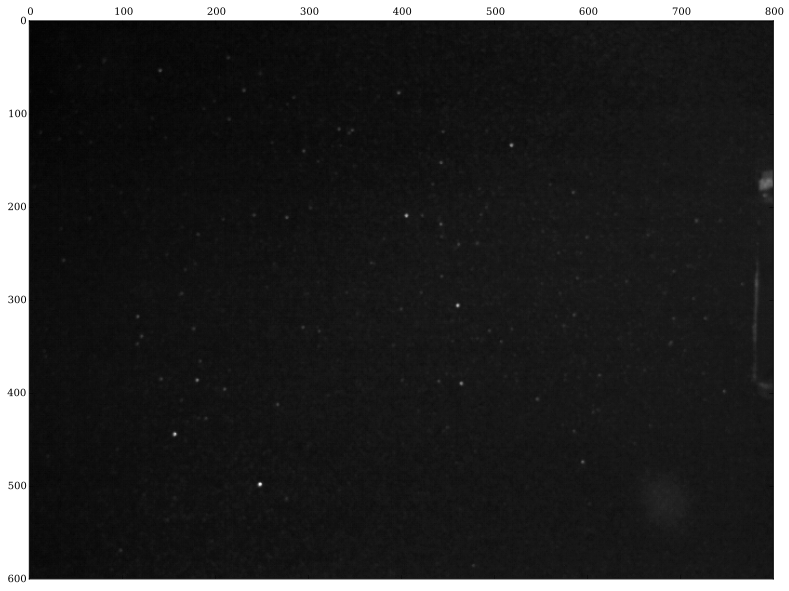

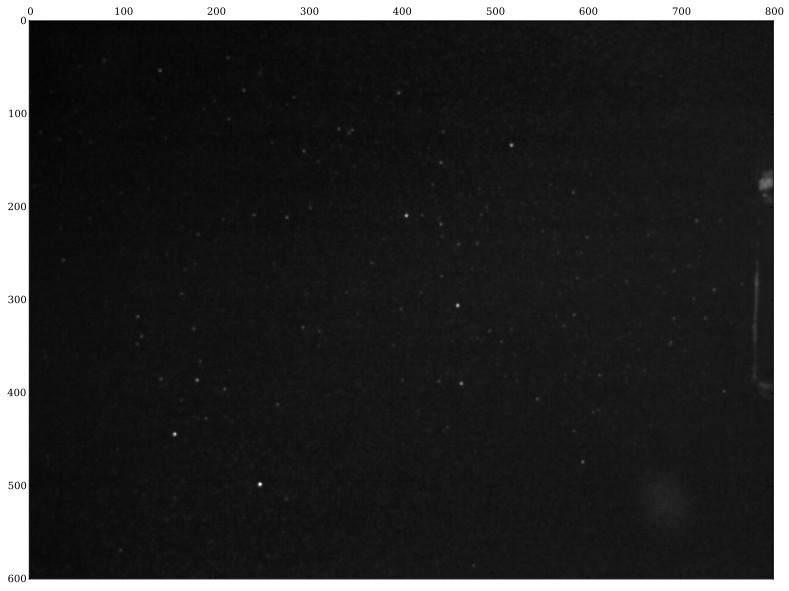